In [70]:
import yfinance as yf
import datetime
from datetime import timedelta
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

In [71]:
#Importing data
def get_data(symbol, days, interval='1d'):
    end_date = datetime.datetime.today()
    start_date = end_date - timedelta(days=days)
    
    data = yf.download(symbol, start=start_date, end=end_date, interval=interval)
    return data

In [72]:
def returns(dataframe, periods=1):
    dataframe['returns'] = dataframe['Adj Close'].pct_change(periods=periods)
    return dataframe

In [73]:
def return_options(prices, Ks, range_begin, range_end, stock_price, option_types=['call'], plot = True):
    x_axes = np.arange(range_begin, range_end, 0.01)
    net_return = np.zeros_like(x_axes)  # Initialize net return array (absolute values)

    for price, K, option_type in zip(prices, Ks, option_types):
        y_axes = []
        for i in x_axes:
            if option_type == 'call':
                if price >= 0:  # Buying call
                    if K <= i:
                        y_axes.append((i - K) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                else:  # Selling call
                    if K <= i:
                        y_axes.append((K - i) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
            else:  # Put option
                if price >= 0:  # Buying put
                    if K >= i:
                        y_axes.append((K - i) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                else:  # Selling put
                    if K >= i:
                        y_axes.append((i - K) - price)  # Calculate absolute return
                    else:
                        y_axes.append(-price)  # Calculate absolute return
                        
        stock_ret = x_axes - stock_price
        net_return += np.array(y_axes) + stock_ret  # Aggregate net return (absolute values)
    
    if plot:
        # Plot the net return in dollars
        plt.figure(figsize=(6, 6))
        plt.plot(x_axes, net_return, color='blue', label='Net Return')
        plt.xlabel('Underlying Price')
        plt.ylabel('Net Option Return')
        plt.title('Net Return of Options')
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()
    else:
        return(pd.DataFrame({'X-axes': x_axes, 'Net Return': net_return}))

In [74]:
# Going for average return in 90 days, so 90 days untill expiration
data = get_data("BFIT", 2560)
data = returns(data, 30)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2017-09-13,16.190001,16.190001,16.190001,16.190001,15.443720,0,NaN
2017-09-14,16.219999,16.219999,16.219999,16.219999,15.472339,100,NaN
2017-09-15,16.260000,16.260000,16.260000,16.260000,15.510495,250,NaN
2017-09-18,16.320000,16.320000,16.180000,16.180000,15.434183,282,NaN
2017-09-19,16.180000,16.180000,16.180000,16.180000,15.434183,0,NaN
...,...,...,...,...,...,...,...
2024-02-14,21.379999,21.420000,21.360001,21.360001,21.360001,1283,-0.046003
2024-02-15,21.350000,21.439899,21.350000,21.389999,21.389999,2587,-0.026196
2024-02-16,21.510000,21.510000,21.389999,21.389999,21.389999,1119,-0.010638


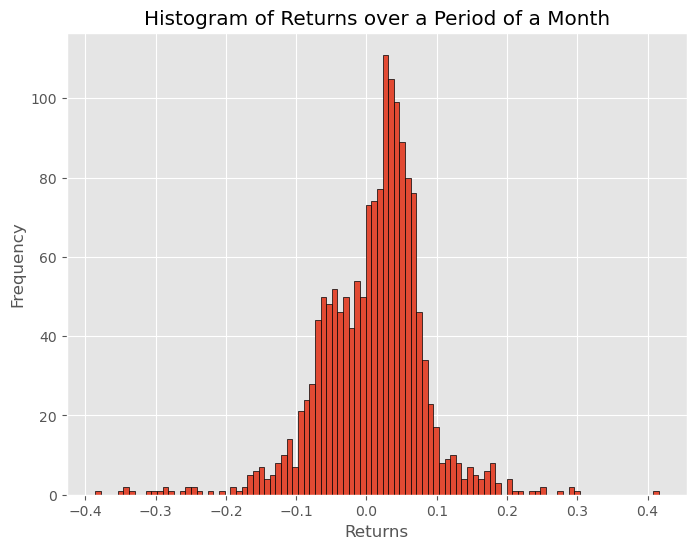

Date
2017-10-25    0.002409
2017-10-26    0.000555
2017-10-27   -0.001907
2017-10-30    0.003028
2017-10-31    0.009271
                ...   
2024-02-14   -0.046003
2024-02-15   -0.026196
2024-02-16   -0.010638
2024-02-20   -0.014286
2024-02-21   -0.029932
Name: returns, Length: 1590, dtype: float64


In [75]:
returns_data = data['returns'].dropna()

bins = 100

# Create a histogram of the returns
plt.figure(figsize=(8, 6))
plt.hist(returns_data, bins=bins, edgecolor='black')
plt.title('Histogram of Returns over a Period of a Month')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(returns_data)

  1 / 105: ksone
  2 / 105: kstwo
  3 / 105: kstwobign
  4 / 105: norm
  5 / 105: alpha
  6 / 105: anglit
  7 / 105: arcsine
  8 / 105: beta
  9 / 105: betaprime
 10 / 105: bradford
 11 / 105: burr
 12 / 105: burr12
 13 / 105: fisk
 14 / 105: cauchy
 15 / 105: chi
 16 / 105: chi2
 17 / 105: cosine
 18 / 105: dgamma
 19 / 105: dweibull
 20 / 105: expon
 21 / 105: exponnorm
 22 / 105: exponweib
 23 / 105: exponpow
 24 / 105: fatiguelife
 25 / 105: foldcauchy
 26 / 105: f
 27 / 105: foldnorm
 28 / 105: weibull_min
 29 / 105: truncweibull_min
 30 / 105: weibull_max
 31 / 105: genlogistic
 32 / 105: genpareto
 33 / 105: genexpon
 34 / 105: genextreme
 35 / 105: gamma
 36 / 105: erlang
 37 / 105: gengamma
 38 / 105: genhalflogistic
 39 / 105: genhyperbolic
 40 / 105: gompertz
 41 / 105: gumbel_r
 42 / 105: gumbel_l
 43 / 105: halfcauchy
 44 / 105: halflogistic
 45 / 105: halfnorm
 46 / 105: hypsecant
 47 / 105: gausshyper
 48 / 105: invgamma
 49 / 105: invgauss
 50 / 105: geninvgauss
 51 / 1

Text(0.5, 1.0, 'genhyperbolic(p=1.20, a=0.00, b=-0.00, loc=0.04, scale=0.00)')

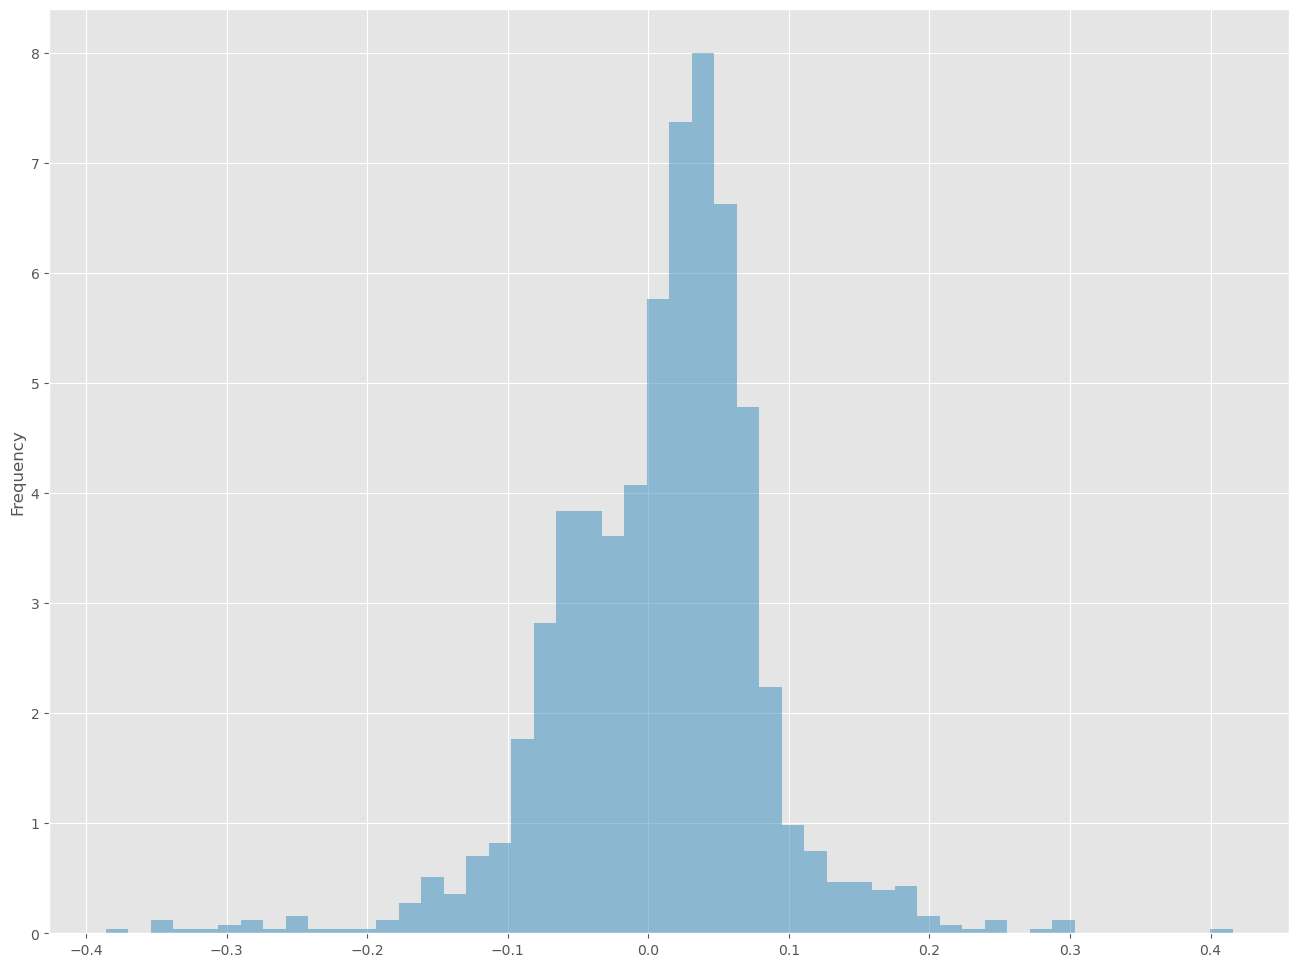

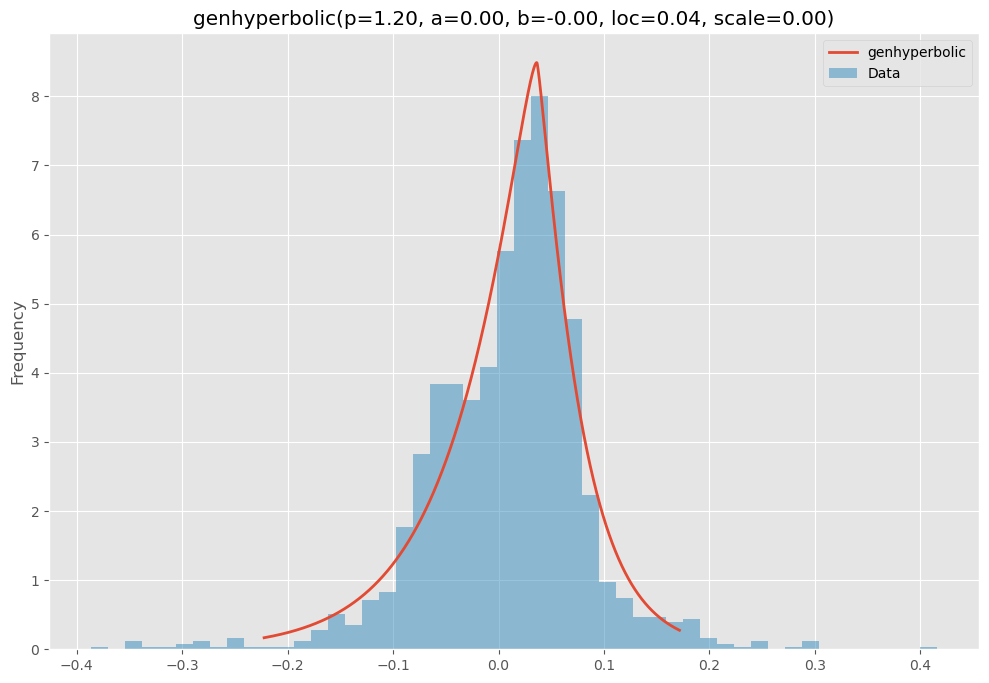

In [76]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')
                
                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]
                
                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))
                
                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))
        
        except Exception:
            pass

    
    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf


ax = returns_data.plot(kind='hist', bins=50, density=True, label = "Data",alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(returns_data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)

# Make PDF with best params 
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label=best_dist[0].name, legend=True)
returns_data.plot(kind='hist', bins=50, density=True, alpha=0.5, label="Data", legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(dist_str)

In [77]:
#covered call case (strike and premium made up because of lack of data)
stock_price = data['Close'].iloc[-1]
premium = [-0.43]
prem = -0.43
K = [23.5]
types = ['call']
lower = 15
upper = 30
table = return_options(premium, K, lower, upper, stock_price, types, plot = False)
table['stock_return'] = table['X-axes'] / stock_price - 1

# Define the parameters for the Laplace asymmetric distribution
from scipy.stats import laplace_asymmetric
kappa = 1.25
loc = 0.03
scale = 0.05

# Compute the probability density for each stock return
table['probability'] = laplace_asymmetric.pdf(table['stock_return'], kappa=kappa, loc=loc, scale=scale)
table['probability'] = table['probability']/sum(table['probability'])

table['expected value'] = table['probability'] * table['Net Return']
print(table)
print(stock_price)

      X-axes  Net Return  stock_return   probability  expected value
0      15.00   -5.959999     -0.298738  2.377660e-05       -0.000142
1      15.01   -5.949999     -0.298270  2.395512e-05       -0.000143
2      15.02   -5.939999     -0.297803  2.413498e-05       -0.000143
3      15.03   -5.929999     -0.297335  2.431619e-05       -0.000144
4      15.04   -5.919999     -0.296868  2.449876e-05       -0.000145
...      ...         ...           ...           ...             ...
1495   29.95    2.540001      0.400187  4.377223e-07        0.000001
1496   29.96    2.540001      0.400655  4.326361e-07        0.000001
1497   29.97    2.540001      0.401122  4.276090e-07        0.000001
1498   29.98    2.540001      0.401590  4.226403e-07        0.000001
1499   29.99    2.540001      0.402057  4.177294e-07        0.000001

[1500 rows x 5 columns]
21.389999389648438


In [78]:
#Check if probability is correct
sum(table['probability'])

1.000000000000002

In [79]:
#Expected ROI
sum(table['expected value'])/(stock_price+prem) * 100

2.648548369548949

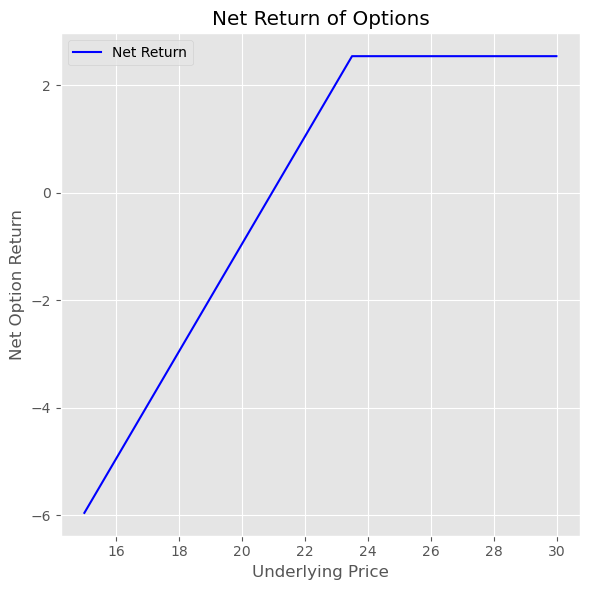

In [80]:
#Demonstration option function (covered call position)
return_options(premium, K, lower, upper, stock_price, types, plot = True)

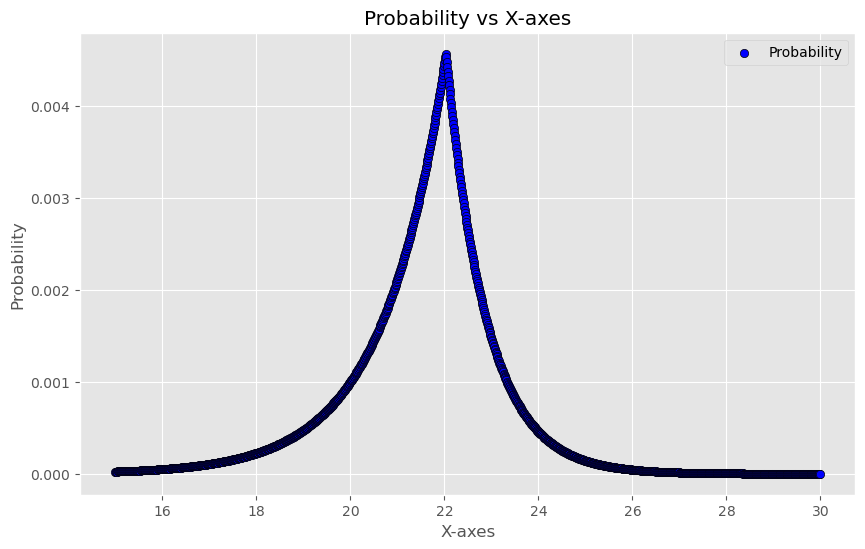

In [81]:
# Plot expected value against X-axes as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['X-axes'], table['probability'], color='b', label='Probability', edgecolor='k')
plt.xlabel('X-axes')
plt.ylabel('Probability')
plt.title('Probability vs X-axes')
plt.grid(True)
plt.legend()
plt.show()

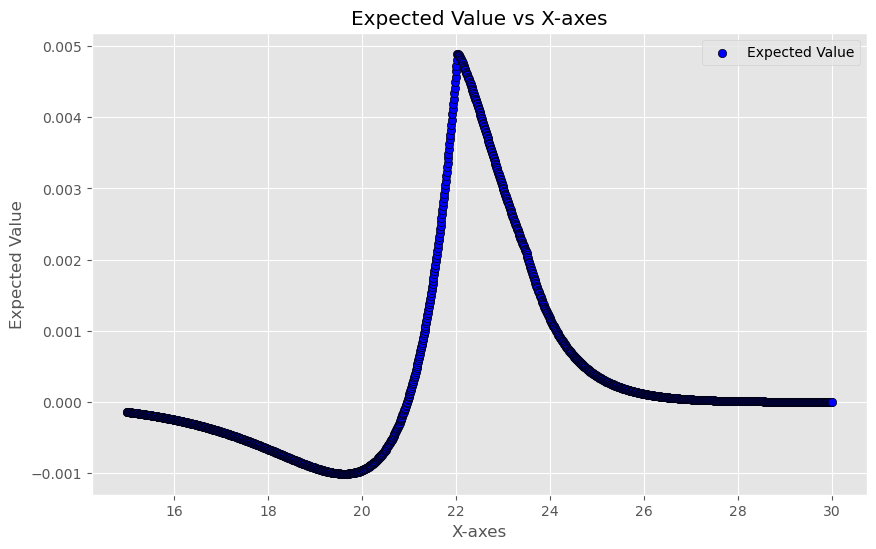

In [82]:
# Plot expected value against X-axes as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(table['X-axes'], table['expected value'], color='b', label='Expected Value', edgecolor='k')
plt.xlabel('X-axes')
plt.ylabel('Expected Value')
plt.title('Expected Value vs X-axes')
plt.grid(True)
plt.legend()
plt.show()